<a href="https://colab.research.google.com/github/sadiq937/Shaik_DM/blob/main/ps1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sadiq937/Shaik_DM/blob/main/ps1.ipynb).

## **DATA MANAGEMENT - PS1 - By FNU SHAIK MOHAMMED SADIQ**

## **Project Overview**  
This project focuses on analyzing sales and customer relationship management (CRM) data to gain insights into sales opportunities, team performance, and product trends. The primary goal is to clean, preprocess, merge, and visualize data from multiple sources, ensuring meaningful insights that can drive business decision-making.  

## **Dataset Summary**  
The dataset consists of multiple files in different formats, including:  

- **`accounts.html`** – Contains information about customer accounts and their details.  
- **`sales_pipeline.csv`** – Tracks the sales pipeline, including deals, opportunities, and their current status.  
- **`sales_teams.json`** – Provides data on different sales teams and their performance.  
- **`products.csv`** – Contains information on available products and their attributes.  
- **`data_dictionary.parquet`** – Defines metadata for understanding the dataset structure.  

## **Data Source**  
The dataset is sourced from **Kaggle** under the title **"CRM + Sales + Opportunities Analysis"** (https://www.kaggle.com/datasets/innocentmfa/crm-sales-opportunities), designed to simulate real-world CRM and sales data that businesses use for tracking sales performance and optimizing strategies.  

## **Project Motivation**  
Understanding sales and CRM data is crucial for businesses to enhance their sales strategies, optimize team performance, and improve revenue forecasting. This project will apply **data wrangling, exploratory data analysis (EDA), and visualization** techniques to uncover patterns and insights that can help businesses make data-driven decisions.  


#### **Installing Dependencies**

In [ ]:
pip install pyreadstat

In [ ]:
import pandas as pd
import pyreadstat
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
sns.set(style="darkgrid")

#### **Uploading Multiple Data files**

In [ ]:
!wget -q -O accounts.html https://drive.google.com/uc?id=1x_aU7MXW9U_4qBX969iLKJDYyUioRl8S&export=download
!wget -q -O data_dictionary.parquet https://drive.google.com/uc?id=1ekfPeY7Nd2HZX6Yp-Aohk1V6qP3tOY_P&export=download
!wget -q -O products.csv https://drive.google.com/uc?id=1vHGF3UbolMJPiy4mxbt-NxXFn5xfWbBD&export=download
!wget -q -O sales_pipeline.csv https://drive.google.com/uc?id=1uQMOXC7ooh9G-OBD6GnoWGo6yg8pDUBV&export=download
!wget -q -O sales_teams.json https://drive.google.com/uc?id=1r0Xo89L6-YM1gJhXKaRFeDNnsvnbQJMJ&export=download


In [ ]:
# Read the CSV file
sales_df = pd.read_csv("sales_pipeline.csv")
print("\nSales Pipeline Data (CSV):")
print(sales_df.head(6))
sales_df.tail(6)


Sales Pipeline Data (CSV):
  opportunity_id      sales_agent         product   account deal_stage  \
0       1C1I7A6R      Moses Frase  GTX Plus Basic   Cancity        Won   
1       Z063OYW0  Darcel Schlecht          GTXPro     Isdom        Won   
2       EC4QE1BX  Darcel Schlecht      MG Special   Cancity        Won   
3       MV1LWRNH      Moses Frase       GTX Basic   Codehow        Won   
4       PE84CX4O        Zane Levy       GTX Basic    Hatfan        Won   
5       ZNBS69V1    Anna Snelling      MG Special  Ron-tech        Won   

  engage_date  close_date  close_value  
0  2016-10-20  2017-03-01       1054.0  
1  2016-10-25  2017-03-11       4514.0  
2  2016-10-25  2017-03-07         50.0  
3  2016-10-25  2017-03-09        588.0  
4  2016-10-25  2017-03-02        517.0  
5  2016-10-29  2017-03-01         49.0  


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
8794,IUM2FVA1,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8799,8I5ONXJX,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


In [ ]:
sales_df.columns

Index(['opportunity_id', 'sales_agent', 'product', 'account', 'deal_stage',
       'engage_date', 'close_date', 'close_value'],
      dtype='object')

In [ ]:
sales_df

,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
...,...,...,...,...,...,...,...,...
8795,9MIWFW5J,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8796,6SLKZ8FI,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8797,LIB4KUZJ,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN
8798,18IUIUK0,Versie Hillebrand,MG Advanced,NaN,Prospecting,NaN,NaN,NaN


In [ ]:
sales_df["close_value"][0:8] #subset or slice

,close_value
0,1054.0
1,4514.0
2,50.0
3,588.0
4,517.0
5,49.0
6,57.0
7,601.0


In [ ]:
sales_df[["product","close_value"]][5:12]

,product,close_value
5,MG Special,49.0
6,MG Special,57.0
7,GTX Basic,601.0
8,GTX Plus Basic,1026.0
9,MG Advanced,NaN
10,MG Special,53.0
11,GTXPro,0.0


In [ ]:
# Read the JSON file
sales_teams_df = pd.read_json("sales_teams.json", lines=True)
print("\nSales Teams Data (JSON):")
print(sales_teams_df.head())


Sales Teams Data (JSON):
         sales_agent           manager regional_office
0      Anna Snelling  Dustin Brinkmann         Central
1     Cecily Lampkin  Dustin Brinkmann         Central
2  Versie Hillebrand  Dustin Brinkmann         Central
3    Lajuana Vencill  Dustin Brinkmann         Central
4        Moses Frase  Dustin Brinkmann         Central


In [ ]:
# Read the Parquet file
data_dict_df = pd.read_parquet("data_dictionary.parquet")
print("\nData Dictionary (Parquet):")
print(data_dict_df.head())


Data Dictionary (Parquet):
      Table             Field                          Description
0  accounts           account                         Company name
1  accounts            sector                             Industry
2  accounts  year_established                     Year Established
3  accounts           revenue  Annual revenue (in millions of USD)
4  accounts         employees                  Number of employees


In [ ]:
# Read the  csv file
products_df = pd.read_csv("products.csv")
print("\nProducts Data (csv):")
print(products_df.head())


Products Data (csv):
        product series  sales_price
0     GTX Basic    GTX          550
1       GTX Pro    GTX         4821
2    MG Special     MG           55
3   MG Advanced     MG         3393
4  GTX Plus Pro    GTX         5482


In [ ]:
products_df.dtypes

,0
product,object
series,object
sales_price,int64


In [ ]:
# Read the HTML file
accounts_df = pd.read_html("accounts.html")[0]  # Extract first table from HTML
print("Accounts Data (HTML):")
print(accounts_df.head())

Accounts Data (HTML):
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical              1991   326.82       1016   

  office_location subsidiary_of  
0   United States           NaN  
1   United States           NaN  
2           Kenya           NaN  
3      Philipines           NaN  
4   United States           NaN  


In [ ]:
accounts_df.sample(frac=0.1, replace=False, random_state=2)

,account,sector,year_established,revenue,employees,office_location,subsidiary_of
11,Condax,medical,2017,4.54,9,United States,NaN
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
78,Y-corporation,employment,1983,2871.35,9561,United States,NaN
28,Globex Corporation,technolgy,2000,1223.72,2497,Norway,NaN
76,Xx-holding,finance,1993,7537.24,20293,United States,NaN
59,Rundofase,technolgy,1983,1008.06,1238,United States,NaN
14,dambase,marketing,1995,2173.98,2928,United States,Inity
29,Gogozoom,telecommunications,2007,86.68,187,United States,Sonron


In [ ]:
accounts_df["year_established"].value_counts(dropna=False)[0:10]

,count
year_established,
1996,4
1995,4
1997,4
1993,4
1994,4
2003,3
1988,3
1999,3
1982,3


In [ ]:
# Function to display descriptive statistics
def display_stats(df, name):
    print(f"\nDescriptive Statistics for {name}:")
    print(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum())

In [ ]:
# Function to plot distributions
def plot_distributions(df, column, name):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f"Distribution of {column} in {name}")
    plt.show()

In [ ]:
crosstab_table = pd.crosstab(accounts_df["employees"], accounts_df["revenue"])
reduced_table = crosstab_table.iloc[0:10, 0:8]
reduced_table

revenue,4.54,40.79,45.39,52.50,71.12,86.68,98.79,167.89
employees,,,,,,,,
9,1,0,0,0,0,0,0,0
96,0,0,0,0,0,0,1,0
100,0,0,1,0,0,0,0,0
142,0,1,0,0,0,0,0,0
144,0,0,0,0,1,0,0,0
165,0,0,0,1,0,0,0,0
187,0,0,0,0,0,1,0,0
299,0,0,0,0,0,0,0,0
315,0,0,0,0,0,0,0,0


<Axes: title={'center': 'Employees vs Revenue'}, xlabel='employees', ylabel='revenue'>

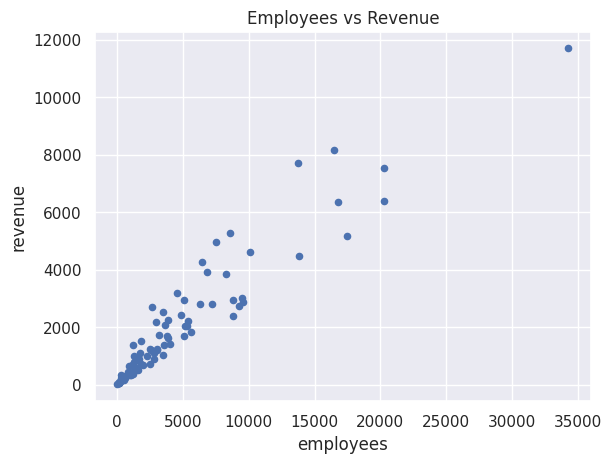

In [ ]:
accounts_df.plot(kind='scatter', y='revenue', x='employees', title='Employees vs Revenue')

<Axes: xlabel='revenue', ylabel='employees'>

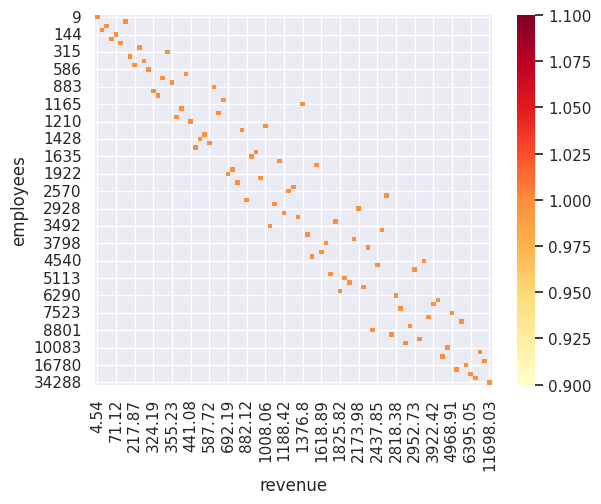

In [ ]:
sns.heatmap(accounts_df.pivot_table(index='employees', columns='revenue', aggfunc='size'), cmap='YlOrRd')

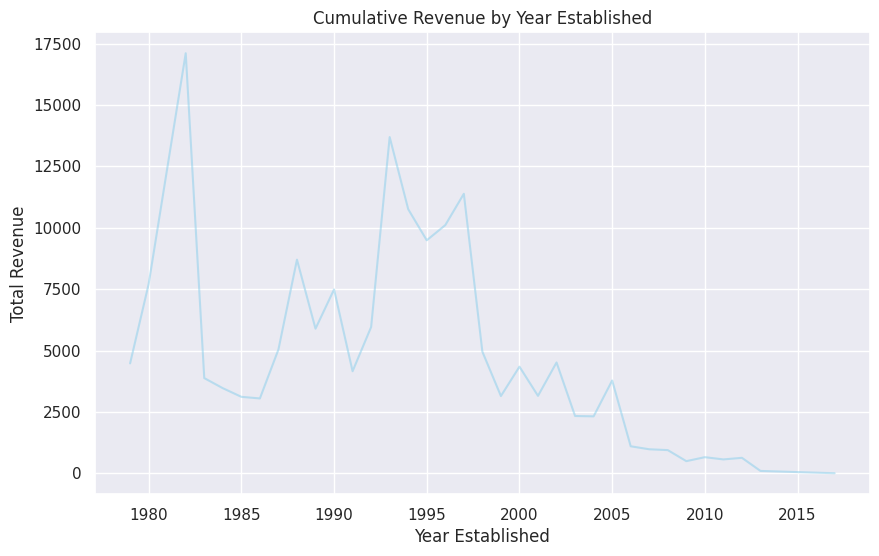

In [ ]:
grouped_data = accounts_df.groupby('year_established')['revenue'].sum()

grouped_data.plot(
    kind='line',
    title='Cumulative Revenue by Year Established',
    xlabel='Year Established',
    ylabel='Total Revenue',
    figsize=(10, 6),
    color='skyblue',
    alpha=0.5
)

# Display the plot
plt.show()


Descriptive Statistics for Accounts Data:
       year_established       revenue     employees
count         85.000000     85.000000     85.000000
mean        1996.105882   1994.632941   4660.823529
std            8.865427   2169.491436   5715.601198
min         1979.000000      4.540000      9.000000
25%         1989.000000    497.110000   1179.000000
50%         1996.000000   1223.720000   2769.000000
75%         2002.000000   2741.370000   5595.000000
max         2017.000000  11698.030000  34288.000000

Missing Values:
account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64


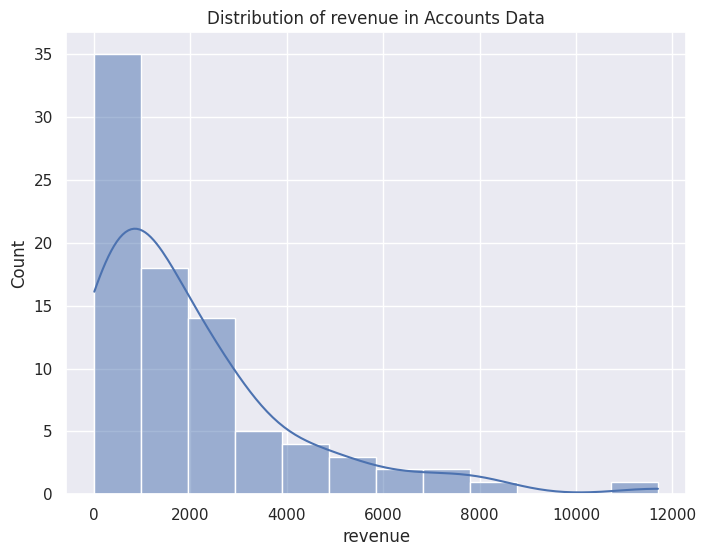

In [ ]:
# Descriptive stats for accounts data
display_stats(accounts_df, "Accounts Data")
plot_distributions(accounts_df, 'revenue', "Accounts Data")


Descriptive Statistics for Sales Pipeline Data:
        close_value
count   6711.000000
mean    1490.915512
std     2320.670773
min        0.000000
25%        0.000000
50%      472.000000
75%     3225.000000
max    30288.000000

Missing Values:
opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64


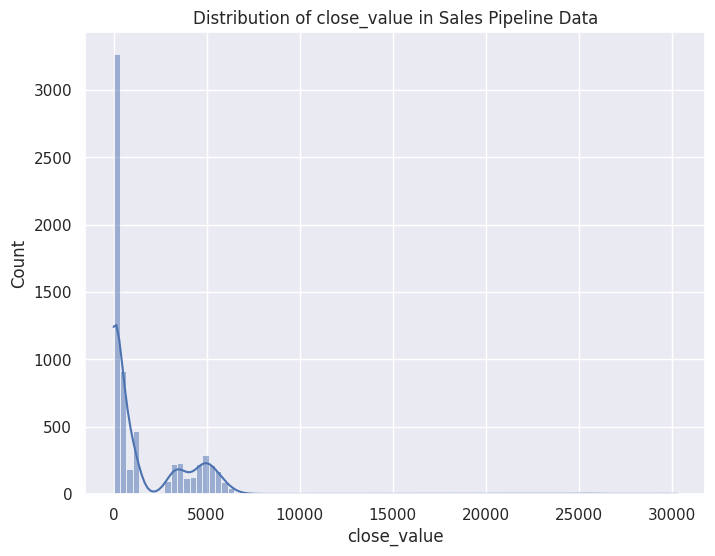

In [ ]:
# Descriptive stats for sales pipeline data
display_stats(sales_df, "Sales Pipeline Data")
plot_distributions(sales_df, 'close_value', "Sales Pipeline Data")

In [ ]:
# Descriptive stats for sales teams data
display_stats(sales_teams_df, "Sales Teams Data")


Descriptive Statistics for Sales Teams Data:
          sales_agent        manager regional_office
count              35             35              35
unique             35              6               3
top     Anna Snelling  Melvin Marxen            East
freq                1              6              12

Missing Values:
sales_agent        0
manager            0
regional_office    0
dtype: int64


## **Data Manipulation**

In [ ]:
# Subset/Slice on condition: Filter sales with close_value > 10000 and close_value < 50000
high_value_sales = sales_df[(sales_df['close_value'] > 10000) & (sales_df['close_value'] < 50000)]

print("\nHigh-Value Sales (10000 < close_value < 20000):")
print(high_value_sales.head())


High-Value Sales (10000 < close_value < 20000):
     opportunity_id      sales_agent  product        account deal_stage  \
59         XUSUEAV7     Elease Gluck  GTK 500         Zoomit        Won   
677        60UOBOEM  Rosalina Dieter  GTK 500   Groovestreet        Won   
1156       4V0S4BA3   Markita Hansen  GTK 500     Goodsilron        Won   
1825       JXUXBANJ  Rosalina Dieter  GTK 500  Y-corporation        Won   
2559       OUIK8VX3     Elease Gluck  GTK 500     Lexiqvolax        Won   

     engage_date  close_date  close_value  
59    2016-11-20  2017-03-09      25897.0  
677   2017-02-01  2017-06-07      30288.0  
1156  2017-02-27  2017-06-27      29617.0  
1825  2017-03-26  2017-04-05      25288.0  
2559  2017-04-19  2017-04-20      23746.0  


In [ ]:
# Filter variables using regex: Select columns containing 'sales' in their names
sales_columns = sales_df.filter(regex='sales', axis=1)
print("\nColumns with 'sales' in their names:")
print(sales_columns.head())


Columns with 'sales' in their names:
       sales_agent
0      Moses Frase
1  Darcel Schlecht
2  Darcel Schlecht
3      Moses Frase
4        Zane Levy


In [ ]:
# Groupby and aggregate: Total sales by sales_agent
sales_by_agent = sales_df.groupby('sales_agent')['close_value'].sum().reset_index()
print("\nTotal Sales by Sales Agent:")
print(sales_by_agent)


Total Sales by Sales Agent:
           sales_agent  close_value
0        Anna Snelling     275056.0
1            Boris Faz     261631.0
2         Cassey Cress     450489.0
3       Cecily Lampkin     229800.0
4        Corliss Cosme     421036.0
5      Daniell Hammack     364229.0
6      Darcel Schlecht    1153214.0
7        Donn Cantrell     445860.0
8         Elease Gluck     289195.0
9        Garret Kinder     197773.0
10    Gladys Colclough     345674.0
11       Hayden Neloms     272111.0
12      James Ascencio     413533.0
13  Jonathan Berthelot     284886.0
14       Kami Bicknell     316456.0
15     Kary Hendrixson     454298.0
16     Lajuana Vencill     194632.0
17      Markita Hansen     328792.0
18   Marty Freudenburg     291195.0
19     Maureen Marcano     350395.0
20         Moses Frase     207182.0
21     Niesha Huffines     176961.0
22        Reed Clapper     438336.0
23     Rosalina Dieter     235403.0
24  Rosie Papadopoulos     230169.0
25   Versie Hillebrand     187693.0

In [ ]:
# Groupby and aggregate: Average revenue by sector in accounts data
revenue_by_sector = accounts_df.groupby('sector')['revenue'].mean().reset_index()
print("\nAverage Revenue by Sector:")
print(revenue_by_sector)


Average Revenue by Sector:
               sector      revenue
0          employment  1526.160000
1       entertainment  1610.870000
2             finance  2029.167500
3           marketing  1633.797500
4             medical  1414.740000
5              retail  1609.162353
6            services   988.938000
7            software  4421.492857
8           technolgy  2315.044167
9  telecommunications  2743.651667



Merged Sales and Sales Teams Data:
  opportunity_id      sales_agent         product  account deal_stage  \
0       1C1I7A6R      Moses Frase  GTX Plus Basic  Cancity        Won   
1       Z063OYW0  Darcel Schlecht          GTXPro    Isdom        Won   
2       EC4QE1BX  Darcel Schlecht      MG Special  Cancity        Won   
3       MV1LWRNH      Moses Frase       GTX Basic  Codehow        Won   
4       PE84CX4O        Zane Levy       GTX Basic   Hatfan        Won   

  engage_date  close_date  close_value           manager regional_office  
0  2016-10-20  2017-03-01       1054.0  Dustin Brinkmann         Central  
1  2016-10-25  2017-03-11       4514.0     Melvin Marxen         Central  
2  2016-10-25  2017-03-07         50.0     Melvin Marxen         Central  
3  2016-10-25  2017-03-09        588.0  Dustin Brinkmann         Central  
4  2016-10-25  2017-03-02        517.0     Summer Sewald            West  


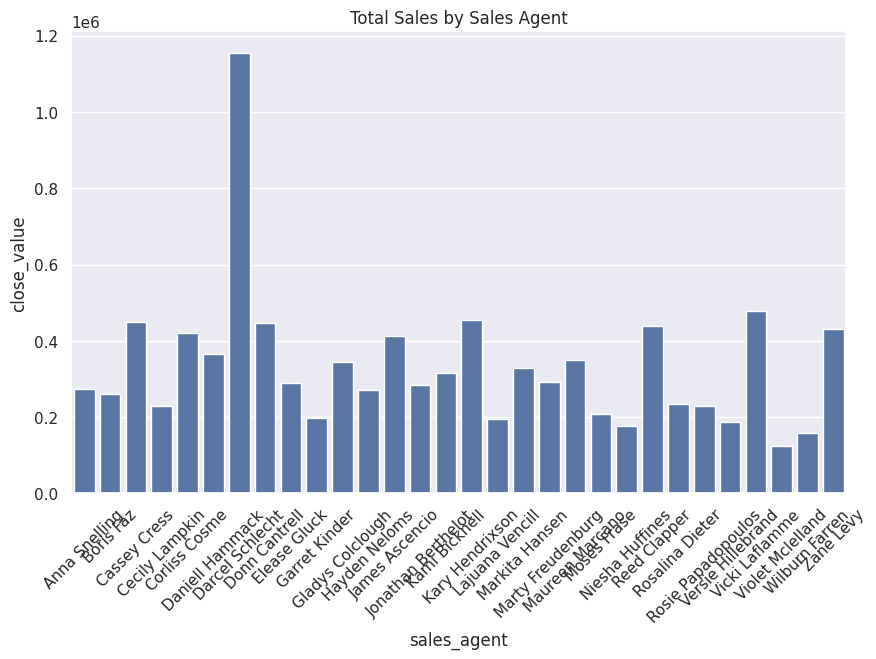

In [ ]:
# Extra Features

# Merge datasets: Combine sales data with sales teams data
merged_df = pd.merge(sales_df, sales_teams_df, on='sales_agent', how='left')
print("\nMerged Sales and Sales Teams Data:")
print(merged_df.head())

# Visualize total sales by agent
plt.figure(figsize=(10, 6))
sns.barplot(x='sales_agent', y='close_value', data=sales_by_agent)
plt.title("Total Sales by Sales Agent")
plt.xticks(rotation=45)
plt.show()


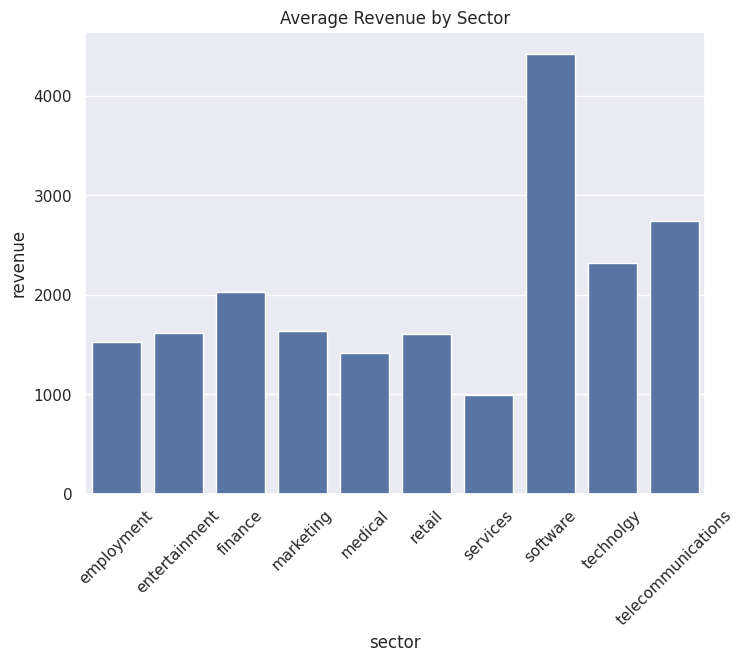

In [ ]:
# Visualize average revenue by sector
plt.figure(figsize=(8, 6))
sns.barplot(x='sector', y='revenue', data=revenue_by_sector)
plt.title("Average Revenue by Sector")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Export results to CSV
high_value_sales.to_csv('high_value_sales.csv', index=False)
sales_by_agent.to_csv('sales_by_agent.csv', index=False)
revenue_by_sector.to_csv('revenue_by_sector.csv', index=False)
print("\nExported high_value_sales.csv, sales_by_agent.csv, and revenue_by_sector.csv")


Exported high_value_sales.csv, sales_by_agent.csv, and revenue_by_sector.csv


In [ ]:
# Data Cleaning: Handle missing values in accounts data
accounts_df['revenue'].fillna(accounts_df['revenue'].median(), inplace=True)
print("\nAccounts Data after filling missing values:")
print(accounts_df.head())


Accounts Data after filling missing values:
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical              1991   326.82       1016   

  office_location subsidiary_of  
0   United States           NaN  
1   United States           NaN  
2           Kenya           NaN  
3      Philipines           NaN  
4   United States           NaN  


<ipython-input-198-e7a93688ccf1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  accounts_df['revenue'].fillna(accounts_df['revenue'].median(), inplace=True)


# PS2

In [3]:
import pandas as pd

# Load datasets
bank_df = pd.read_csv("https://raw.githubusercontent.com/sadiq937/Shaik_DM/refs/heads/main/bank.csv", delimiter=';')
credit_df = pd.read_csv("https://raw.githubusercontent.com/sadiq937/Shaik_DM/refs/heads/main/default%20of%20credit%20card%20clients.csv", skiprows=1)

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
# Rename columns in the credit dataset based on known documentation
credit_df.columns = [
    "ID", "LIMIT_BAL", "SEX", "EDUCATION", "MARRIAGE", "age", "PAY_0", "PAY_2", "PAY_3", "PAY_4",
    "PAY_5", "PAY_6", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6", "DEFAULT"
]
credit_df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,age,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
credit_df["age"].dtype   # As age coloumn data type is in int no need to convert it to numeric

dtype('int64')

In [6]:
bank_df["age"].dtype

dtype('int64')

In [8]:
outer_merge = pd.merge(bank_df, credit_df, left_on="age", right_on="age", how="outer")
outer_merge

,age,job,marital,education,default,balance,housing,loan,contact,day,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,19,student,single,primary,no,103,no,no,cellular,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19,student,single,unknown,no,0,no,no,cellular,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19,student,single,secondary,no,302,no,no,cellular,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,student,single,unknown,no,1169,no,no,cellular,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,student,single,secondary,no,502,no,no,cellular,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3686133,83,retired,divorced,primary,no,0,no,no,telephone,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3686134,83,retired,divorced,primary,no,1097,no,no,telephone,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3686135,84,retired,divorced,primary,no,639,no,no,telephone,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3686136,86,retired,married,secondary,no,1503,no,no,telephone,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Merge datasets with indicator=True to add a '_merge' column indicating the source (bank_df, credit_df, or both), and sort by 'age' for easier analysis.
outer_merge1 = pd.merge(bank_df, credit_df, on="age", how="outer", indicator=True).sort_values(by="age")
(outer_merge1.head(20))

,age,job,marital,education,default,balance,housing,loan,contact,day,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,_merge
0,19,student,single,primary,no,103,no,no,cellular,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,19,student,single,unknown,no,0,no,no,cellular,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,19,student,single,secondary,no,302,no,no,cellular,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,19,student,single,unknown,no,1169,no,no,cellular,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,20,student,single,secondary,no,502,no,no,cellular,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,20,student,single,secondary,no,291,no,no,telephone,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,20,student,single,secondary,no,1191,no,no,cellular,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
317,21,student,single,unknown,no,137,yes,no,unknown,12,...,25091.0,0.0,2019.0,2511.0,10000.0,502.0,0.0,0.0,0.0,both
318,21,student,single,unknown,no,137,yes,no,unknown,12,...,9602.0,9357.0,1489.0,2302.0,2400.0,0.0,2000.0,3000.0,0.0,both
319,21,student,single,unknown,no,137,yes,no,unknown,12,...,14138.0,16138.0,1327.0,0.0,2000.0,283.0,2000.0,859.0,0.0,both


In [6]:
# Perform an inner join on the 'age' column from both DataFrames
inner_merge = pd.merge(bank_df, credit_df, on="age", how="inner")
inner_merge.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,17878,18931,19617,1300,1300,1000,1500,1000,1012,0
2,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,-923,-1488,-1884,131,396,396,565,792,0,0
3,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,25209,26636,29197,3000,5000,0,2000,3000,0,0
4,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,2280,300,4250,300,1159,2280,300,4250,909,0
5,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,21993,19899,19771,1576,1213,648,768,1140,0,1
6,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,32891,33564,34056,223,33178,1171,1197,1250,5000,0
7,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,167163,146975,122324,7300,7108,7680,6200,5000,4500,0
8,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,4340,2672,800,3288,0,4340,2672,800,746,0
9,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,1438,1919,5380,504,500,1000,500,3500,0,0


In [4]:
left_merge = pd.merge(bank_df, credit_df, on="age", how="left", indicator=True).sort_values(by="education")
left_merge.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,_merge
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1.0,both
1027703,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,291.0,732.0,0.0,0.0,0.0,1455.0,732.0,291.0,0.0,both
1027704,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,17710.0,18079.0,2536.0,2454.0,1588.0,780.0,803.0,673.0,0.0,both
1027705,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,49268.0,48241.0,5011.0,0.0,2000.0,20000.0,15000.0,5000.0,1.0,both
1027706,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both
1027707,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,6056.0,2852.0,0.0,1176.0,1000.0,121.0,57.0,5507.0,1.0,both
1027708,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,604.0,14850.0,428.0,5306.0,0.0,604.0,14850.0,2403.0,0.0,both
1027709,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,17061.0,17419.0,2882.0,0.0,1259.0,591.0,613.0,608.0,1.0,both
1027702,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,2300.0,2300.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,both
1027710,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,3703.0,3500.0,1000.0,7397.0,0.0,3703.0,3500.0,3697.0,0.0,both


In [5]:
left_merge = pd.merge(bank_df, credit_df, on="age", how="left", indicator=True).sort_values(by="education").reset_index(drop=True)
left_merge.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,_merge
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1.0,both
1,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,291.0,732.0,0.0,0.0,0.0,1455.0,732.0,291.0,0.0,both
2,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,17710.0,18079.0,2536.0,2454.0,1588.0,780.0,803.0,673.0,0.0,both
3,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,49268.0,48241.0,5011.0,0.0,2000.0,20000.0,15000.0,5000.0,1.0,both
4,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,both
5,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,6056.0,2852.0,0.0,1176.0,1000.0,121.0,57.0,5507.0,1.0,both
6,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,604.0,14850.0,428.0,5306.0,0.0,604.0,14850.0,2403.0,0.0,both
7,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,17061.0,17419.0,2882.0,0.0,1259.0,591.0,613.0,608.0,1.0,both
8,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,2300.0,2300.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,both
9,30,blue-collar,married,primary,no,1,yes,yes,telephone,22,...,3703.0,3500.0,1000.0,7397.0,0.0,3703.0,3500.0,3697.0,0.0,both


In [7]:
right_merge = pd.merge(bank_df, credit_df, on="age", how="right", indicator=True).sort_values(by=["age", "EDUCATION", "job", "balance"]).reset_index(drop=True)
right_merge = right_merge.sort_values(by=["age", "EDUCATION", "job", "balance"], ascending=[True, True, True, False])
right_merge.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,_merge
7,21,services,single,secondary,no,1903,yes,no,unknown,29,...,1393,2055,1400,3500,1567,162,2055,0,0,both
8,21,services,single,secondary,no,1903,yes,no,unknown,29,...,19705,8440,1466,1400,390,394,629,0,0,both
9,21,services,single,secondary,no,1903,yes,no,unknown,29,...,0,0,0,1000,590,0,0,0,0,both
10,21,services,single,secondary,no,1903,yes,no,unknown,29,...,12702,4134,5143,5000,1021,0,3000,0,0,both
11,21,services,single,secondary,no,1903,yes,no,unknown,29,...,9699,0,1304,2500,6,0,0,0,0,both
12,21,services,single,secondary,no,1903,yes,no,unknown,29,...,7273,6490,2000,647,489,7273,130,0,0,both
13,21,services,single,secondary,no,1903,yes,no,unknown,29,...,26220,29968,0,2326,11406,524,6284,598,1,both
0,21,services,single,secondary,no,361,no,no,telephone,5,...,1393,2055,1400,3500,1567,162,2055,0,0,both
1,21,services,single,secondary,no,361,no,no,telephone,5,...,19705,8440,1466,1400,390,394,629,0,0,both
2,21,services,single,secondary,no,361,no,no,telephone,5,...,0,0,0,1000,590,0,0,0,0,both


In [13]:
filtered_bank = bank_df[bank_df["age"] == 21]  # Example filter
filtered_credit = credit_df[credit_df["age"] == 21]

cross_merge = filtered_bank.merge(filtered_credit, how="cross")
cross_merge

,age_x,job,marital,education,default,balance,housing,loan,contact,day,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,21,student,single,secondary,no,2488,no,no,cellular,30,...,362,5308,0,14410,0,28,22073,0,0,0
1,21,student,single,secondary,no,2488,no,no,cellular,30,...,1300,0,0,1240,2333,0,0,0,0,0
2,21,student,single,secondary,no,2488,no,no,cellular,30,...,20000,0,0,5000,0,0,0,0,0,1
3,21,student,single,secondary,no,2488,no,no,cellular,30,...,9429,1393,2055,1400,3500,1567,162,2055,0,0
4,21,student,single,secondary,no,2488,no,no,cellular,30,...,8880,9580,9000,1217,1000,200,700,200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,21,student,single,secondary,no,6844,no,no,cellular,14,...,30278,26220,29968,0,2326,11406,524,6284,598,1
465,21,student,single,secondary,no,6844,no,no,cellular,14,...,8560,780,0,1400,1800,1300,800,0,1900,1
466,21,student,single,secondary,no,6844,no,no,cellular,14,...,17482,34862,14860,1252,3124,0,349,297,0,0
467,21,student,single,secondary,no,6844,no,no,cellular,14,...,9768,8430,20735,3905,0,0,300,2165,2666,1


In [6]:
bank_sample = bank_df.sample(n=100, random_state=42)  # To limit colab memory over load i took sample data with
credit_sample = credit_df.sample(n=100, random_state=42)

cross_merge = bank_sample.merge(credit_sample, how="cross")
cross_merge.head(10)

,age_x,job,marital,education,default,balance,housing,loan,contact,day,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,12580,13716,14828,1500,2000,1500,1500,1500,2000,0
1,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,101581,77741,77264,4486,4235,3161,2647,2669,2669,0
2,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,69753,70111,70212,2431,3112,3000,2438,2500,2554,0
3,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,16898,11236,6944,1610,1808,7014,27,7011,4408,0
4,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,19574,20295,19439,2000,1500,1000,1800,0,1000,1
5,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,11512,8490,0,801,11512,0,0,0,950,0
6,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,2625,0,0,0,1000,0,0,0,0,1
7,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,0,0,0,0,0,0,0,0,0,0
8,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,8000,24406,18043,8000,8000,8000,24406,2000,389,0
9,51,entrepreneur,married,secondary,yes,-2082,no,yes,cellular,28,...,0,0,0,0,0,0,0,0,0,0
